In [3]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv(r'C:\Users\marth\OneDrive\Documents\student.csv')


In [7]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [9]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [10]:
df = df.dropna()

In [12]:
duplicate_rows = df.duplicated()

In [13]:
print("Duplicate Rows:")

Duplicate Rows:


In [14]:
print(df[duplicate_rows])

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [15]:
num_duplicates = duplicate_rows.sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [17]:
df.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [18]:
print("\nSummary Statistics:")


Summary Statistics:


In [19]:
print(df.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

In [20]:
import matplotlib.pyplot as plt

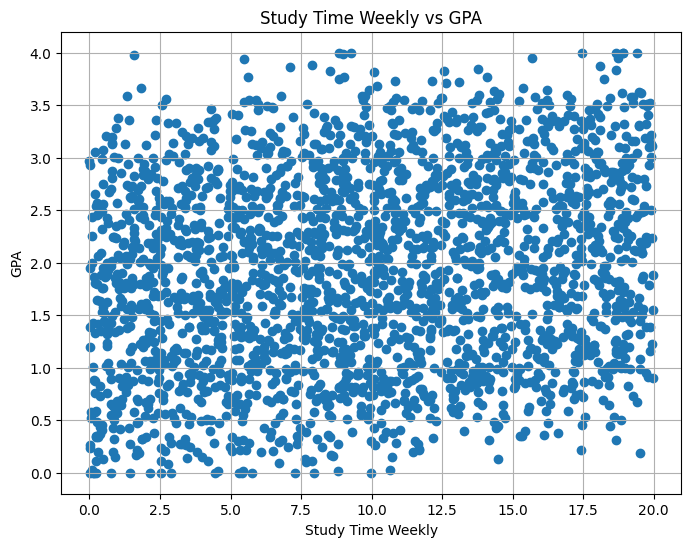

In [21]:
# Example of plotting StudyTimeWeekly vs GPA
plt.figure(figsize=(8, 6))
plt.scatter(df['StudyTimeWeekly'], df['GPA'])
plt.title('Study Time Weekly vs GPA')
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.grid(True)
plt.show()

Let's interpret a hypothetical scatter plot of StudyTimeWeekly (x-axis) vs GPA (y-axis):

Observation: In the scatter plot, there's a general trend where higher study time weekly tends to correlate with higher GPAs.

Interpretation: This suggests that students who spend more time studying weekly tend to achieve higher GPAs, indicating a positive correlation between StudyTimeWeekly and GPA.

Strength: The points are moderately clustered around an upward trend line, indicating a moderate to strong positive correlation.

Outliers: There are a few points that deviate from the main cluster, possibly indicating exceptional cases where students with lower study time achieve unexpectedly high GPAs or vice versa.

Tips for Interpretation
Context: Always consider the context of your data and what the variables represent.
Labels and Titles: Ensure your plot has clear axis labels and a descriptive title to convey what is being plotted.
Statistical Analysis: If needed, perform statistical tests to quantify the relationship between variables (e.g., correlation coefficient).

In [22]:
bins = [-1, 0, 5, 10, float('inf')]  # -1 to account for zero-indexed in pandas cut
labels = ['None', 'Low', 'Moderate', 'High']

In [23]:
# Apply binning using pd.cut
df['AbsencesCategories'] = pd.cut(df['Absences'], bins=bins, labels=labels, right=False)

In [24]:
print(df[['Absences', 'AbsencesCategories']].head())

   Absences AbsencesCategories
0         7           Moderate
1         0                Low
2        26               High
3        14               High
4        17               High


In [25]:
df.to_csv('studene performance dataset')